Kaggle Dataset - German Car sales from Autoscout24
https://www.kaggle.com/datasets/ander289386/cars-germany?resource=download


The data is collected from Autoscout24, one of the largest car markets platforms in Europa for selling new and used cars.
This data set contains car sellings in Germany for the last 10 years.

With this analysis I want to answer the following questions: 
- Which car manufacturer sold the most cars in Germany in the past 10 years?
- How did the selling in cars change over the years and which was the year with the most car sellings?
- How was the price development in the past 10 years and which brand had the hightest price development?
- Do germans spend more money for faster car (cars with more horsepower)?

In [17]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("data/autoscout24-germany-dataset.csv")

In [4]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [3]:
df.shape

(46405, 9)

In [6]:
#Check for missing values

for col in df.columns:
    print(f"{col} : % {round((df[col].isna().sum())/(len(df[col]))*100, 4)}")

mileage : % 0.0
make : % 0.0
model : % 0.3082
fuel : % 0.0
gear : % 0.3922
offerType : % 0.0
price : % 0.0
hp : % 0.0625
year : % 0.0


In [10]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [12]:
null_data = df[df.isnull().any(axis=1)]

In [13]:
null_data.shape

(334, 9)

In [15]:
null_data.head(50)

,mileage,make,model,fuel,gear,offerType,price,hp,year
243,93850,Renault,Grand Scenic,Diesel,NaN,Used,7990,110.0,2012
347,52753,Lada,Vesta,Gasoline,NaN,Used,8000,106.0,2017
365,3500,Others,NaN,Electric,Manual,Used,5500,38.0,2018
482,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
612,46850,Suzuki,Alto,Gasoline,NaN,Used,3999,68.0,2011
873,153500,Mitsubishi,ASX,Diesel,NaN,Used,10000,150.0,2014
1333,38000,Renault,ZOE,Electric,NaN,Used,8750,88.0,2016
1866,141000,BMW,318,Gasoline,NaN,Used,8550,136.0,2011
2001,2900,Others,NaN,Electric,Automatic,Used,7900,5.0,2018
2009,60866,Opel,NaN,Gasoline,Manual,Used,12290,82.0,2019


In [5]:
df.dropna(subset=["hp"], inplace=True)

mileage        0
make           0
model        140
fuel           0
gear         179
offerType      0
price          0
hp             0
year           0
dtype: int64

Q1: Which car manufacturer sold the most cars in Germany in the past 10 years?

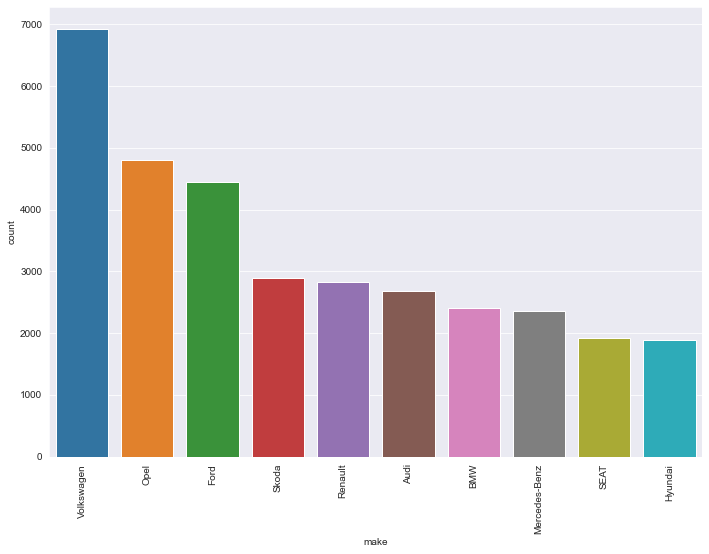

In [19]:
#Create countplot


sns.countplot(x = "make", data = df, order = df["make"].value_counts().iloc[:10].index);
plt.xticks(rotation=90);

Answer: 


In [22]:
most_expensive_cars = df[["make", "model", "price"]].groupby("price", as_index=False).sum().sort_values("price", ascending=False).head(10)
most_expensive_cars

,price,make,model
6664,1199900,Ferrari,F12
6663,717078,MaybachMercedes-Benz,PullmanS 650
6662,499800,Maybach,Pullman
6661,465000,Mercedes-Benz,SLS
6660,449900,Lamborghini,Aventador
6659,439900,LamborghiniFerrari,Aventador812
6658,399999,Lamborghini,Aventador
6657,399911,Porsche,991
6656,398000,Aston,Martin
6655,349800,Lamborghini,Aventador


In [23]:
cars_per_year = df.groupby("year", as_index=False).agg({"make":"count"})

In [24]:
cars_per_year

,year,make
0,2011,4111
1,2012,4217
2,2013,4262
3,2014,4179
4,2015,4209
5,2016,4265
6,2017,4223
7,2018,4222
8,2019,4231
9,2020,4283
